In [39]:
import glob
import os

from ficus import FigureManager
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
!ls ../results/chap1

cdbg-stream		   SAMEA4064425.1.curl.txt  SAMN04126864.2.curl.txt
SAMEA104703328.1.curl.txt  SAMEA4064425.2.curl.txt  SAMN10520155.1.curl.txt
SAMEA104703328.2.curl.txt  SAMEA4774291.1.curl.txt  SAMN10520155.2.curl.txt
SAMEA3176945.1.curl.txt    SAMEA4774291.2.curl.txt  SAMN10537738.1.curl.txt
SAMEA3176945.2.curl.txt    SAMN04088456.1.curl.txt  SAMN10537738.2.curl.txt
SAMEA3894957.1.curl.txt    SAMN04088456.2.curl.txt
SAMEA3894957.2.curl.txt    SAMN04126864.1.curl.txt


In [49]:
files = sorted(glob.glob('../results/chap1/SAM*.curl.txt'))
samples = set([os.path.basename(f).split('.')[0] for f in files])

In [53]:
def get_diffs(df):
    return pd.DataFrame({'d_t': df['elapsed_s'][1:].values - df['elapsed_s'][:-1].values,
                         'd_bytes': df['bytes_read'][1:].values - df['bytes_read'][:-1].values,
                         't': df['elapsed_s'][1:]})

In [85]:
samples

{'SAMEA104703328',
 'SAMEA3176945',
 'SAMEA3894957',
 'SAMEA4064425',
 'SAMEA4774291',
 'SAMN04088456',
 'SAMN04126864',
 'SAMN04349088',
 'SAMN09758735',
 'SAMN10520155',
 'SAMN10537738'}

In [109]:
df.reset_index(drop=True)

,t,bytes/s,accession,MiB/s
0,5,1.291390e+06,SAMEA3176945,1.231565
1,10,1.131311e+06,SAMEA3176945,1.078902
2,15,1.089176e+06,SAMEA3176945,1.038720
3,20,1.049996e+06,SAMEA3176945,1.001354
4,25,9.788450e+05,SAMEA3176945,0.933499
...,...,...,...,...
317,1590,2.272798e+06,SAMEA3176945,2.167509
318,1595,2.475576e+06,SAMEA3176945,2.360893
319,1600,2.681988e+06,SAMEA3176945,2.557743
320,1605,3.069725e+06,SAMEA3176945,2.927518


In [110]:
stream_df = []
for accession in samples:
    print(f'Reading {accession}...')
    left_fn = f'../results/chap1/{accession}.1.curl.txt'
    right_fn = f'../results/chap1/{accession}.2.curl.txt'
    ldf = get_diffs(pd.read_table(left_fn, delim_whitespace=True, names=['elapsed_s', 'bytes_read']))
    rdf = get_diffs(pd.read_table(right_fn, delim_whitespace=True, names=['elapsed_s', 'bytes_read']))
    
    bins = list(range(0, int(max(ldf.t.max(), rdf.t.max())), 5))
    
    ldf = ldf.groupby(pd.cut(ldf.t, labels=bins[1:], bins=bins)).mean()
    ldf['bytes/s'] = ldf.d_bytes / ldf.d_t
    rdf = rdf.groupby(pd.cut(rdf.t, labels=bins[1:], bins=bins)).mean()
    rdf['bytes/s'] = rdf.d_bytes / rdf.d_t
    
    df = pd.DataFrame({'t': ldf.index,
                       'bytes/s': ldf['bytes/s'] + rdf['bytes/s'],
                       'accession': accession})
    df['MiB/s'] = df['bytes/s'] / 1048576

    stream_df.append(df.copy())
stream_df = pd.concat(stream_df).reset_index(drop=True)

Reading SAMEA3894957...
Reading SAMN04349088...
Reading SAMN10537738...
Reading SAMN04088456...
Reading SAMN09758735...
Reading SAMEA4064425...
Reading SAMN10520155...
Reading SAMN04126864...
Reading SAMEA104703328...
Reading SAMEA4774291...
Reading SAMEA3176945...


In [111]:
stream_df

,t,bytes/s,accession,MiB/s
0,5,1.888283e+04,SAMEA3894957,0.018008
1,10,1.264188e+06,SAMEA3894957,1.205623
2,15,1.383822e+06,SAMEA3894957,1.319715
3,20,1.718212e+06,SAMEA3894957,1.638615
4,25,1.904960e+06,SAMEA3894957,1.816712
...,...,...,...,...
5937,1590,2.272798e+06,SAMEA3176945,2.167509
5938,1595,2.475576e+06,SAMEA3176945,2.360893
5939,1600,2.681988e+06,SAMEA3176945,2.557743
5940,1605,3.069725e+06,SAMEA3176945,2.927518


In [ ]:
FigureManager()

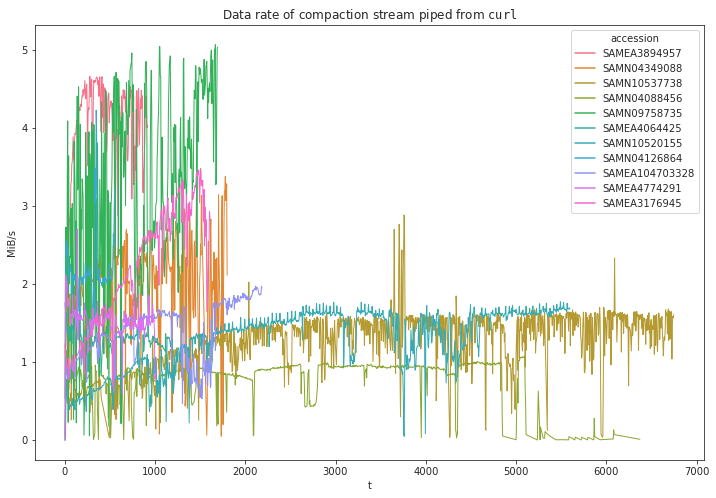

In [120]:
with sns.axes_style("ticks"), \
     FigureManager(show=True, figsize=(12,8)) as (fig, ax):
    
    sns.lineplot(data=stream_df, x='t', y='MiB/s', hue='accession', lw=1, legend=True, ax=ax)
    ax.set_title('Data rate of compaction stream piped from $\mathtt{curl}$')

In [74]:
rdf

,d_t,d_bytes,t,bytes/s
t,,,,
5,3.904500,7.372800e+04,4.98580,1.888283e+04
10,0.833417,5.748053e+05,7.51890,6.896974e+05
15,1.001740,6.995968e+05,12.99142,6.983816e+05
20,0.998440,8.863744e+05,17.99000,8.877593e+05
25,1.001360,9.617408e+05,22.99034,9.604346e+05
...,...,...,...,...
900,1.000520,2.292122e+06,897.98780,2.290930e+06
905,0.999560,2.323251e+06,902.98756,2.324274e+06
910,0.999900,2.051277e+06,907.98778,2.051482e+06


In [75]:
ldf + rdf

,d_t,d_bytes,t,bytes/s
t,,,,
5,4.895900,7.372800e+04,8.04970,1.888283e+04
10,1.828737,1.146607e+06,14.54444,1.264188e+06
15,1.996100,1.381171e+06,24.99794,1.383822e+06
20,1.998700,1.717043e+06,34.99402,1.718212e+06
25,2.002240,1.907098e+06,44.99686,1.904960e+06
...,...,...,...,...
900,2.000040,4.502323e+06,1794.99508,4.502193e+06
905,1.999640,4.618650e+06,1804.98946,4.619489e+06
910,1.999720,4.197581e+06,1814.99012,4.198172e+06


In [51]:
df = stream_df.query('accession == "SAMEA104703328"').query('fragment == "1"')

In [47]:
df.groupby(pd.cut(df.t, labels=list(range(0, int(df.t.max())+1, 5))[:-1], bins=np.arange(0, df.t.max(), 5))).mean()

,d_t,d_bytes,t
t,,,
0,NaN,NaN,NaN
5,0.752675,423936.0,8.20540
10,0.999600,545587.2,12.66928
15,1.000340,427622.4,17.67466
20,1.001720,483328.0,22.67764
...,...,...,...
2165,1.001400,961740.8,2167.11320
2170,0.998780,956825.6,2172.11086
2175,0.999480,1005977.6,2177.11058


In [65]:
ldf.t

1        2.0724
2        3.0639
3        4.0554
4        5.0758
5        6.0014
         ...   
918    919.0009
919    920.0028
920    921.0022
921    922.0002
922    922.9493
Name: t, Length: 922, dtype: float64